# Data Visualisations Notebook

## Objectives

* Answer business requirement 1 
    * The client is interested in discovering how the house attributes correlate with the sale price. Therefore, the client expects data visualisations of the correlated variables against the sale price to show that.

## Inputs

* outputs/datasets/collection/house_prices_records.csv

## Outputs

* generate code that answers business requirement 1 by providing most relevant variables that correlate with sale price.
* provide data visualisations for most relevant house atttributes, and provide conclusions based on the observed trends.



---

# Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/heritage-housing-issues/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/heritage-housing-issues'

# Load Data

In [4]:
import pandas as pd
df = (pd.read_csv("outputs/datasets/collection/house_prices_records.csv"))
df.head(3)

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,0.0,548,RFn,...,65.0,196.0,61,5,7,856,0.0,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,NaN,460,RFn,...,80.0,0.0,0,8,6,1262,NaN,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,0.0,608,RFn,...,68.0,162.0,42,5,7,920,NaN,2001,2002,223500


---

# Data Exploration

Generate pandas report to gain insights on data, including data types, missing data and distribution.

In [5]:
from ydata_profiling import ProfileReport
pandas_report = ProfileReport(df=df, minimal=True)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Observations from the pandas report
* The dataset has 24 variables (columns) and 1460 observations (rows)
* Almost 10% of total data is missing - mostly from two variables 'WoodDeckSF' and 'EnclosedPorch'.
* The dataset has 20 numeric variables and 4 categorical variables
* Variable 'WoodDeckSF' and 'EnclosedPorch' have 90.7% and 89.4% missing data respectively. It may be appropriate to drop or impute this data at a later stage. Given the context, it is possible that the reason for the missing data is that the houses did not have a deck and/or a porch, however, this is speculation and the data in that case should have been an entry of 0.
* Variables 'OverallCond' and 'OverallQual' are categorical variables that have been numerically encoded.
* The data for sales price has a positively skewed distribution, with the majority of observations for sales prices in the range $130k to $214k (interquartile range). There is limited sales price data in the range from $350k+. It will be difficult to build a model that can accurately predict sale prices above $350k and this may be a problem for the client if any of their four inherited houses fall in this range. 

---

# Initial Correlation Study

* Use LabelEncoder to transform categorical variables into numerical ones
* Create new encoded_df which includes encoded variables

In [25]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

label_encoder = LabelEncoder()

encoded_df = pd.DataFrame()

for col in df.columns:
    if df[col].dtype == 'object':
        encoded_col = label_encoder.fit_transform(df[col])
        encoded_df[col+'_encoded'] = encoded_col
    else:
        encoded_df[col] = df[col]

encoded_df.head(3)

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure_encoded,BsmtFinSF1,BsmtFinType1_encoded,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish_encoded,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,3,706,2,150,0.0,548,2,...,65.0,196.0,61,5,7,856,0.0,2003,2003,208500
1,1262,0.0,3.0,1,978,0,284,NaN,460,2,...,80.0,0.0,0,8,6,1262,NaN,1976,1976,181500
2,920,866.0,3.0,2,486,2,434,0.0,608,2,...,68.0,162.0,42,5,7,920,NaN,2001,2002,223500


* We use the `.corr()` method with `spearman` to determine the top 10 most variables most strongly correlated to SalePrice
* The list is sliced at index 1 to exclude the first element because we don't want to include SalePrice v SalePrice

In [10]:
corr_spearman = encoded_df.corr(method='spearman')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10) 
corr_spearman  

OverallQual            0.809829
GrLivArea              0.731310
YearBuilt              0.652682
GarageArea             0.649379
TotalBsmtSF            0.602725
GarageYrBlt            0.593788
1stFlrSF               0.575408
YearRemodAdd           0.571159
KitchenQual_encoded   -0.569857
OpenPorchSF            0.477561
Name: SalePrice, dtype: float64

* We use the `.corr()` method with `pearson` to determine the top 10 most variables most strongly correlated to SalePrice.
* The list is sliced at index 1 to exclude the first element because we don't want to include SalePrice v SalePrice

In [11]:
corr_pearson = encoded_df.corr(method='pearson')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10) 
corr_pearson

OverallQual            0.790982
GrLivArea              0.708624
GarageArea             0.623431
TotalBsmtSF            0.613581
1stFlrSF               0.605852
KitchenQual_encoded   -0.589189
YearBuilt              0.522897
YearRemodAdd           0.507101
GarageYrBlt            0.486362
MasVnrArea             0.477493
Name: SalePrice, dtype: float64

* Moderate to very strong correlations were noticed with both methods.
* We will consider only the variables that are strongly to very strongly correlated with a value > 0.5 or < -0.5 (this are the generally accepted limits for which correlation is considered to be strong).
* We concatenate the strong variables list from spearman and pearson correlations. 'set' ensures each variable appears only once in the new list.

In [13]:
pearson_variables_strong = corr_pearson[(corr_pearson > 0.5) | (corr_pearson < -0.5)].index.tolist()
spearman_variables_strong = corr_spearman[(corr_spearman > 0.5) | (corr_spearman < -0.5)].index.tolist()

variables_with_strong_correlation = set(pearson_variables_strong + spearman_variables_strong)
variables_with_strong_correlation

{'1stFlrSF',
 'GarageArea',
 'GarageYrBlt',
 'GrLivArea',
 'KitchenQual_encoded',
 'OverallQual',
 'TotalBsmtSF',
 'YearBuilt',
 'YearRemodAdd'}

We now have nine of the most important variables for predicting house sale price, all of which are strongly to very strongly correlated to SalePrice
* First floor area in square feet
* Garage area in square feet
* Garage Year Built
* Above grade (ground) living area in square feet
* Kitchen quality
* Overall quality of materials and finishes
* Total basement area in square feet
* Original construction date
* Year of remodelling (or build if it has not been remodelled)

In [14]:
vars_to_study = ['1stFlrSF',
                'GarageArea',
                'GarageYrBlt',
                'GrLivArea',
                'KitchenQual_encoded',
                'OverallQual',
                'TotalBsmtSF',
                'YearBuilt',
                'YearRemodAdd'] 
vars_to_study

['1stFlrSF',
 'GarageArea',
 'GarageYrBlt',
 'GrLivArea',
 'KitchenQual_encoded',
 'OverallQual',
 'TotalBsmtSF',
 'YearBuilt',
 'YearRemodAdd']

# EDA on selected variables

Create a new dataframe with only selected variables and SalePrice

In [15]:
df_eda = encoded_df.filter(vars_to_study + ['SalePrice']) 
df_eda.head(3)

,1stFlrSF,GarageArea,GarageYrBlt,GrLivArea,KitchenQual_encoded,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice
0,856,548,2003.0,1710,2,7,856,2003,2003,208500
1,1262,460,1976.0,1262,3,6,1262,1976,1976,181500
2,920,608,2001.0,1786,2,7,920,2001,2002,223500


## Variables Distribution by Sale Price

* We plot the variables of interest against the SalePrice
* We use a linear regression model to add a line of best fit to the data

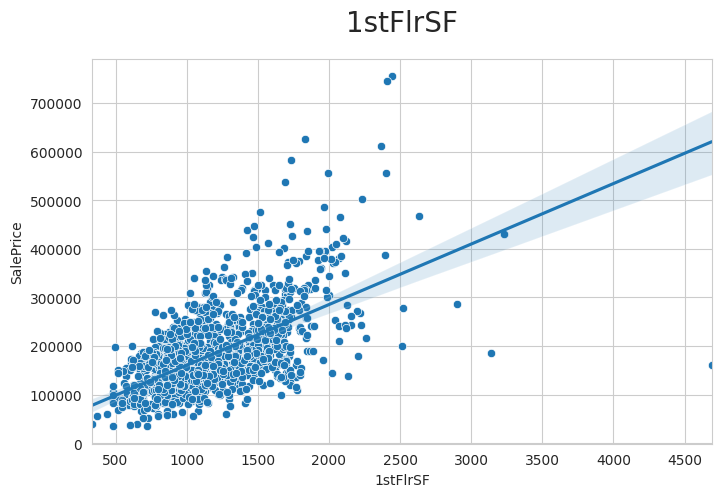

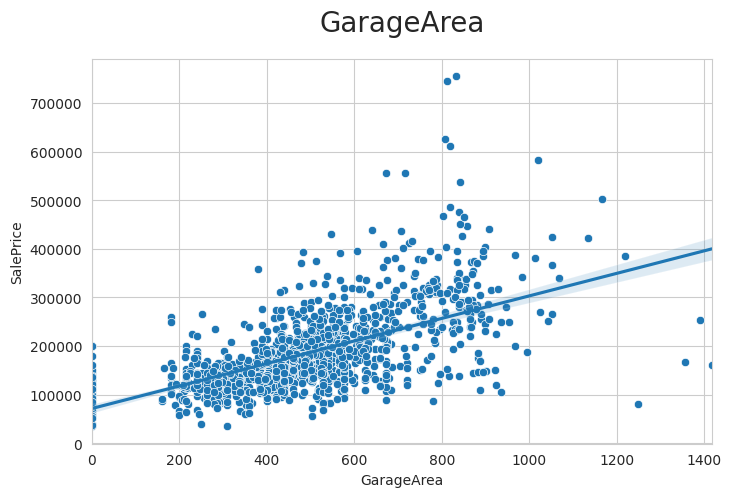

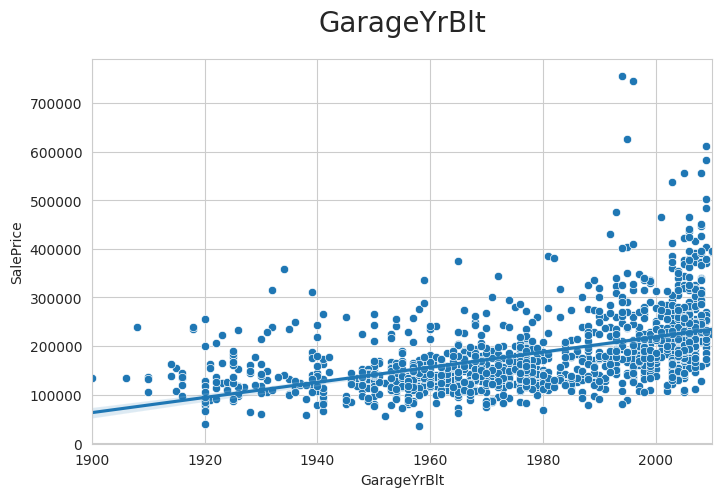

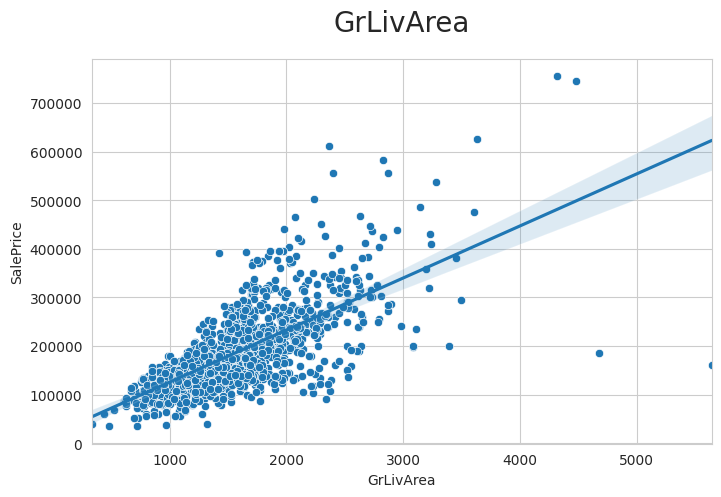

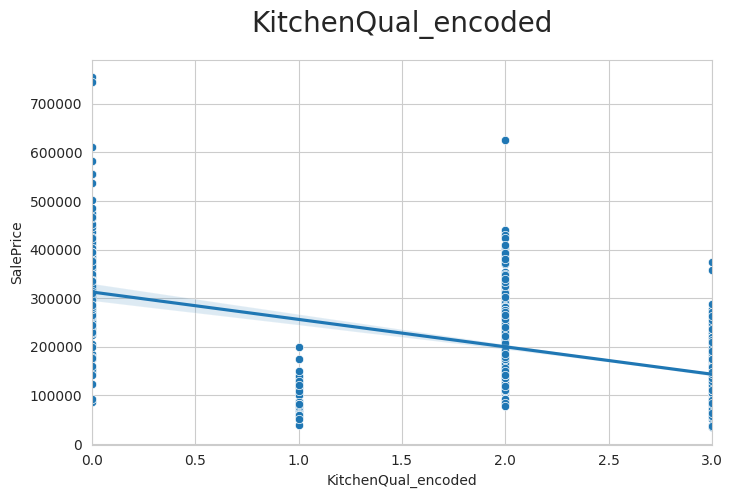

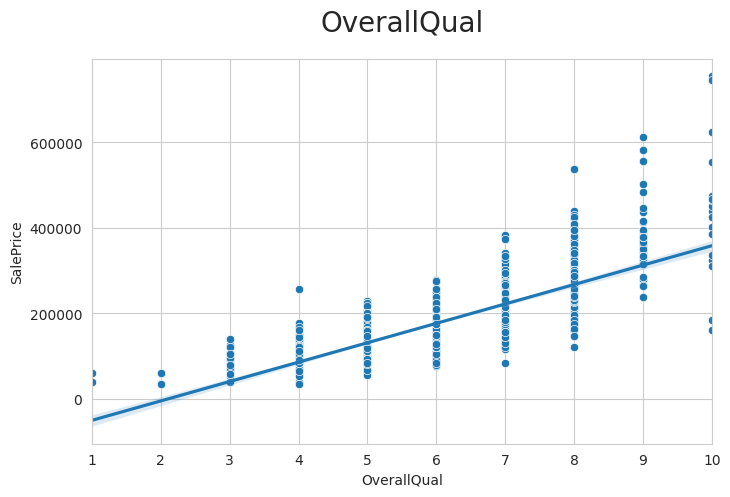

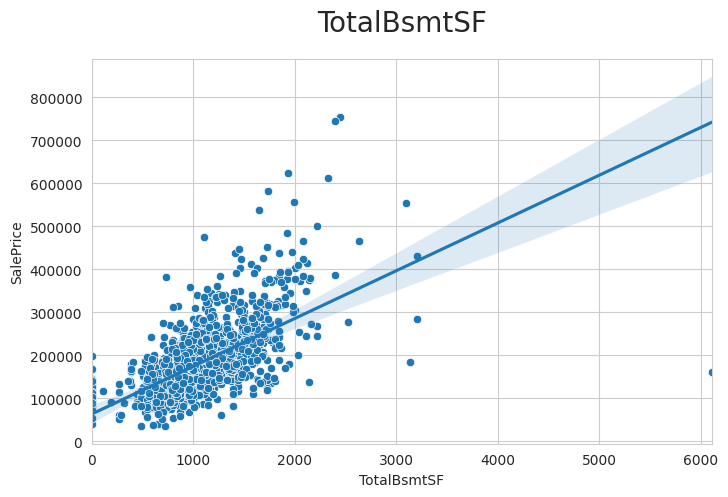

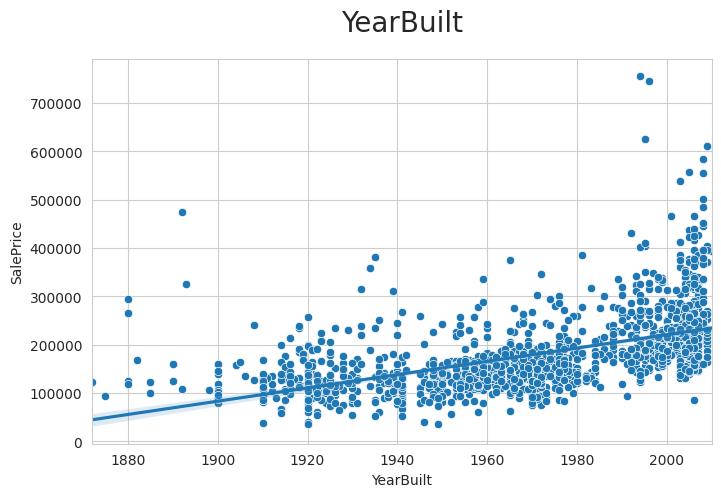

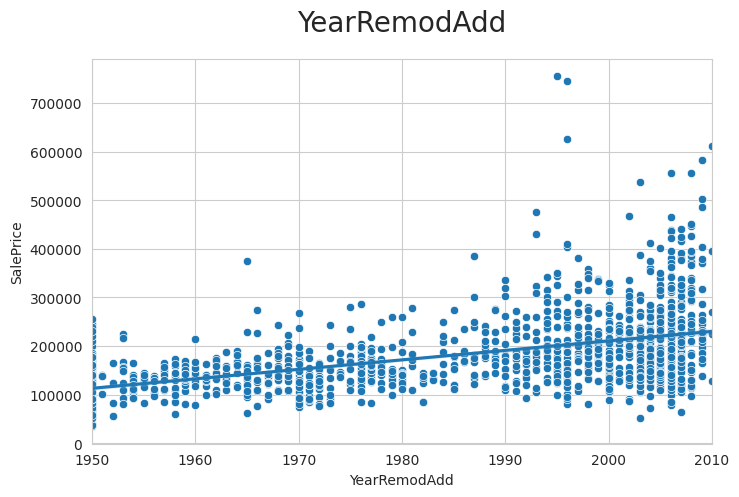

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')


def plot_numerical(df_eda, col):
    """scatterplots of variables vs SalePrice """
    target_var = 'SalePrice'
    for col in vars_to_study:
        fig, axes = plt.subplots(figsize=(8, 5))
        axes = sns.scatterplot(data=df_eda, x=col, y=target_var)
        sns.regplot(data=df_eda, x=col, y=target_var, scatter=False, ax=axes)
        plt.title(f"{col}", fontsize=20, y=1.05)
        plt.show()
        print("\n\n")

plot_numerical(df_eda, col)



* It was noticed that the KitchenQual_encoded scatterplot did not follow the expected trend (expected increase in sales price with increase in kitchen quality)
* Print mapping of categorical variables to numerical variables so we can see which number represents which category.

In [27]:
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
    
print(f"Mapping of original categories to encoded labels for {col}:")
for category, label in label_mapping.items():
    print(f"{category}: {label}")

Mapping of original categories to encoded labels for SalePrice:
Ex: 0
Fa: 1
Gd: 2
TA: 3


# Conclusions

* Scatterplots have been made to allow the client to visualise how the most important house attributes correlate with sales price.
* A linear regression shows the general trend in the data, however is a poor fit in all cases.
* In general, the following variables are positively correlated with the sale price.
    * First floor area in square feet
    * Garage area in square feet
    * Garage year built
    * Above grade (ground) living area in square feet
    * Overall quality of materials and finishes
    * Total basement area in square feet
    * Original construction date
    * Year of remodelling (or build if it has not been remodelled)
* Caution should be taken with the kitchen quality correlation. By eye there is no definite correlation, however, when fitted with a linear regression model there is an increase in sales price with kitchen quality but the fit is poor.
